In [1]:
#import all the required 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
# load data into a Pandas DataFrame
df = pd.read_csv(r'C:\Users\lenovo\OneDrive\Documents\Research\Heart\Dataset\cardio_train.csv') 
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


There are no null values in this dataset, and all data values are either ints or floats.

In [4]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


From an initial statistical overview of the dataset, we infer that some data features are binary or ordinal, whereas other features are continuous. Further, the minimum and maximum values for some features, notably for systolic and diastolic blood pressure (ap_hi and ap_lo), are unrealistic. This suggests the presence of outliers in the data.

In [5]:
# check distribution of target variable
df.cardio.value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

35,021 out of 70,000 cases in this dataset are labelled as having no cardiovascular disease, and 34,979 cases are labelled as having cardiovascular disease. This suggests that the dataset is roughly balanced.

<Axes: >

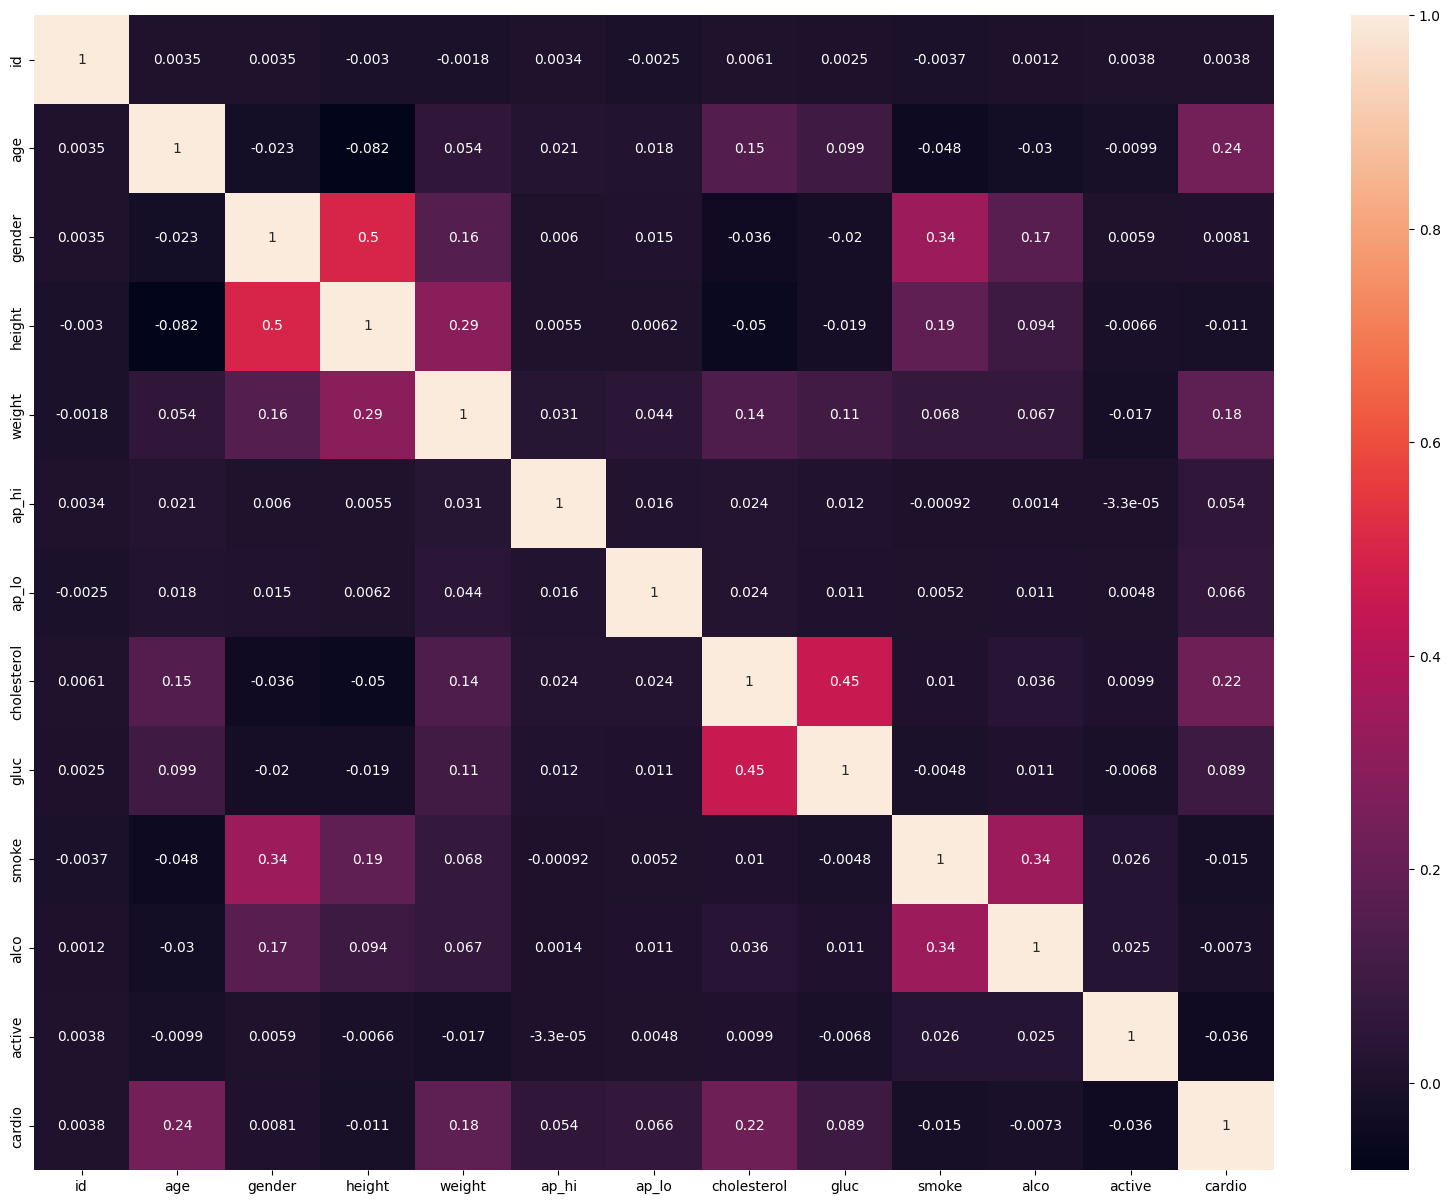

In [6]:
# check correlations
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)

A heatmap shows correlations between variables in the dataset. From the above heatmap, we see that no features directly correlate with the label (cardio) and that generally, there do not exist significant correlations between other variables. However, correlations exist between a select few variables:

- Height and gender are correlated with a score of 0.5.
- Glucose and cholesterol are correlated with a score of 0.45.
- Smoking habits and gender are correlated with a score of 0.34.
- Smoking habits and alcohol consumption are correlated with a score of 0.34. 

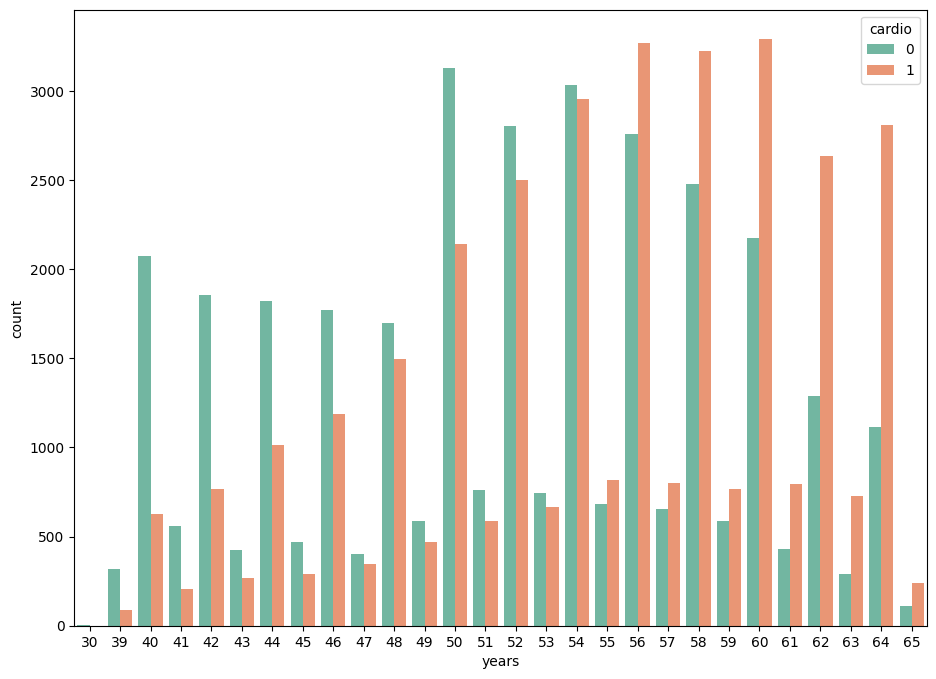

In [7]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
df['years'] = (df['age'] / 365).round().astype('int')
sns.countplot(x='years', hue='cardio', data = df, palette="Set2");

It can be observed that people over 55 of age are more exposed to CVD.

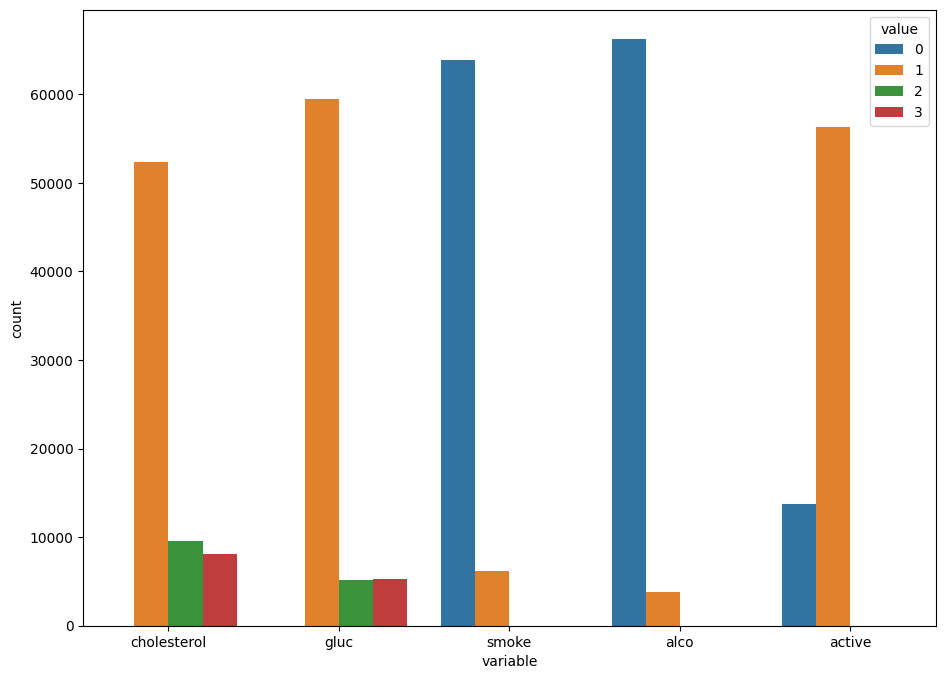

In [8]:
df_categorical = df.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(df_categorical));

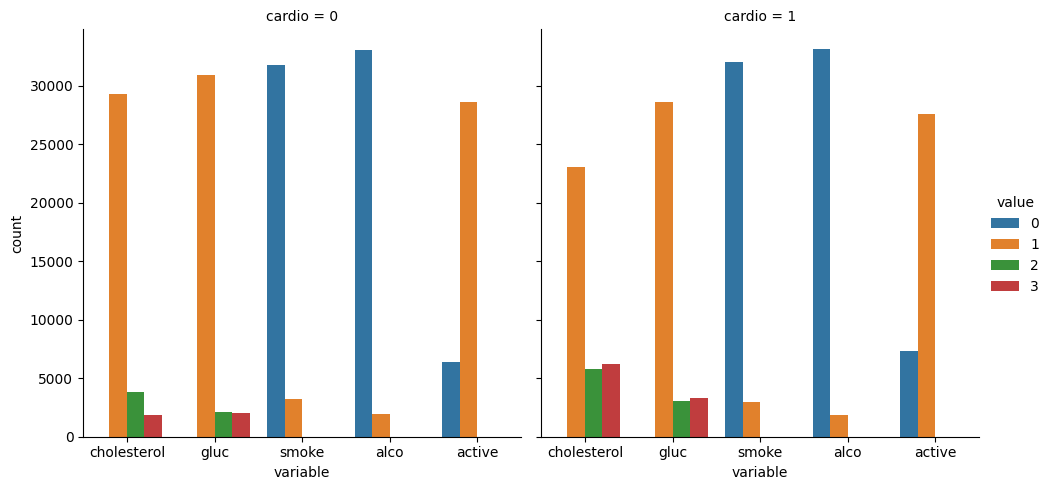

In [9]:
df_long = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio",
                data=df_long, kind="count");

It can be clearly seen that patients with CVD have higher cholesterol and blood glucose level. And, generally speaking less active.

To figure out whether "1" stands for women or men in gender column, let's calculate the mean of height per gender. We assume that men are higher than women on average.

In [10]:
df.groupby('gender')['height'].mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

Average height for "2" gender is greater, than for "1" gender, therefore "1" stands for women. Let's see how many men and women presented in the dataset:

In [11]:
df['gender'].value_counts()

gender
1    45530
2    24470
Name: count, dtype: int64

Who more often report consuming alcohol - men or women?

In [12]:
df.groupby('gender')['alco'].sum()

gender
1    1161
2    2603
Name: alco, dtype: int64

So, men consume alcohol more frequently on average. Next, the target variables are balanced:

In [13]:
df['cardio'].value_counts(normalize=True)

cardio
0    0.5003
1    0.4997
Name: proportion, dtype: float64

To see how the target class is distributed among men and women, we can use also crosstab

In [14]:
pd.crosstab(df['cardio'],df['gender'],normalize=True)

gender,1,2
cardio,,
0,0.327343,0.172957
1,0.323086,0.176614


In [15]:
# cleaning data

# Let's remove weights and heights, that fall below 2.5% or above 97.5% of a given range.
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)

In [16]:
l = df.columns.values
number_of_columns=int((len(l)-1)/2)
print(number_of_columns)

6


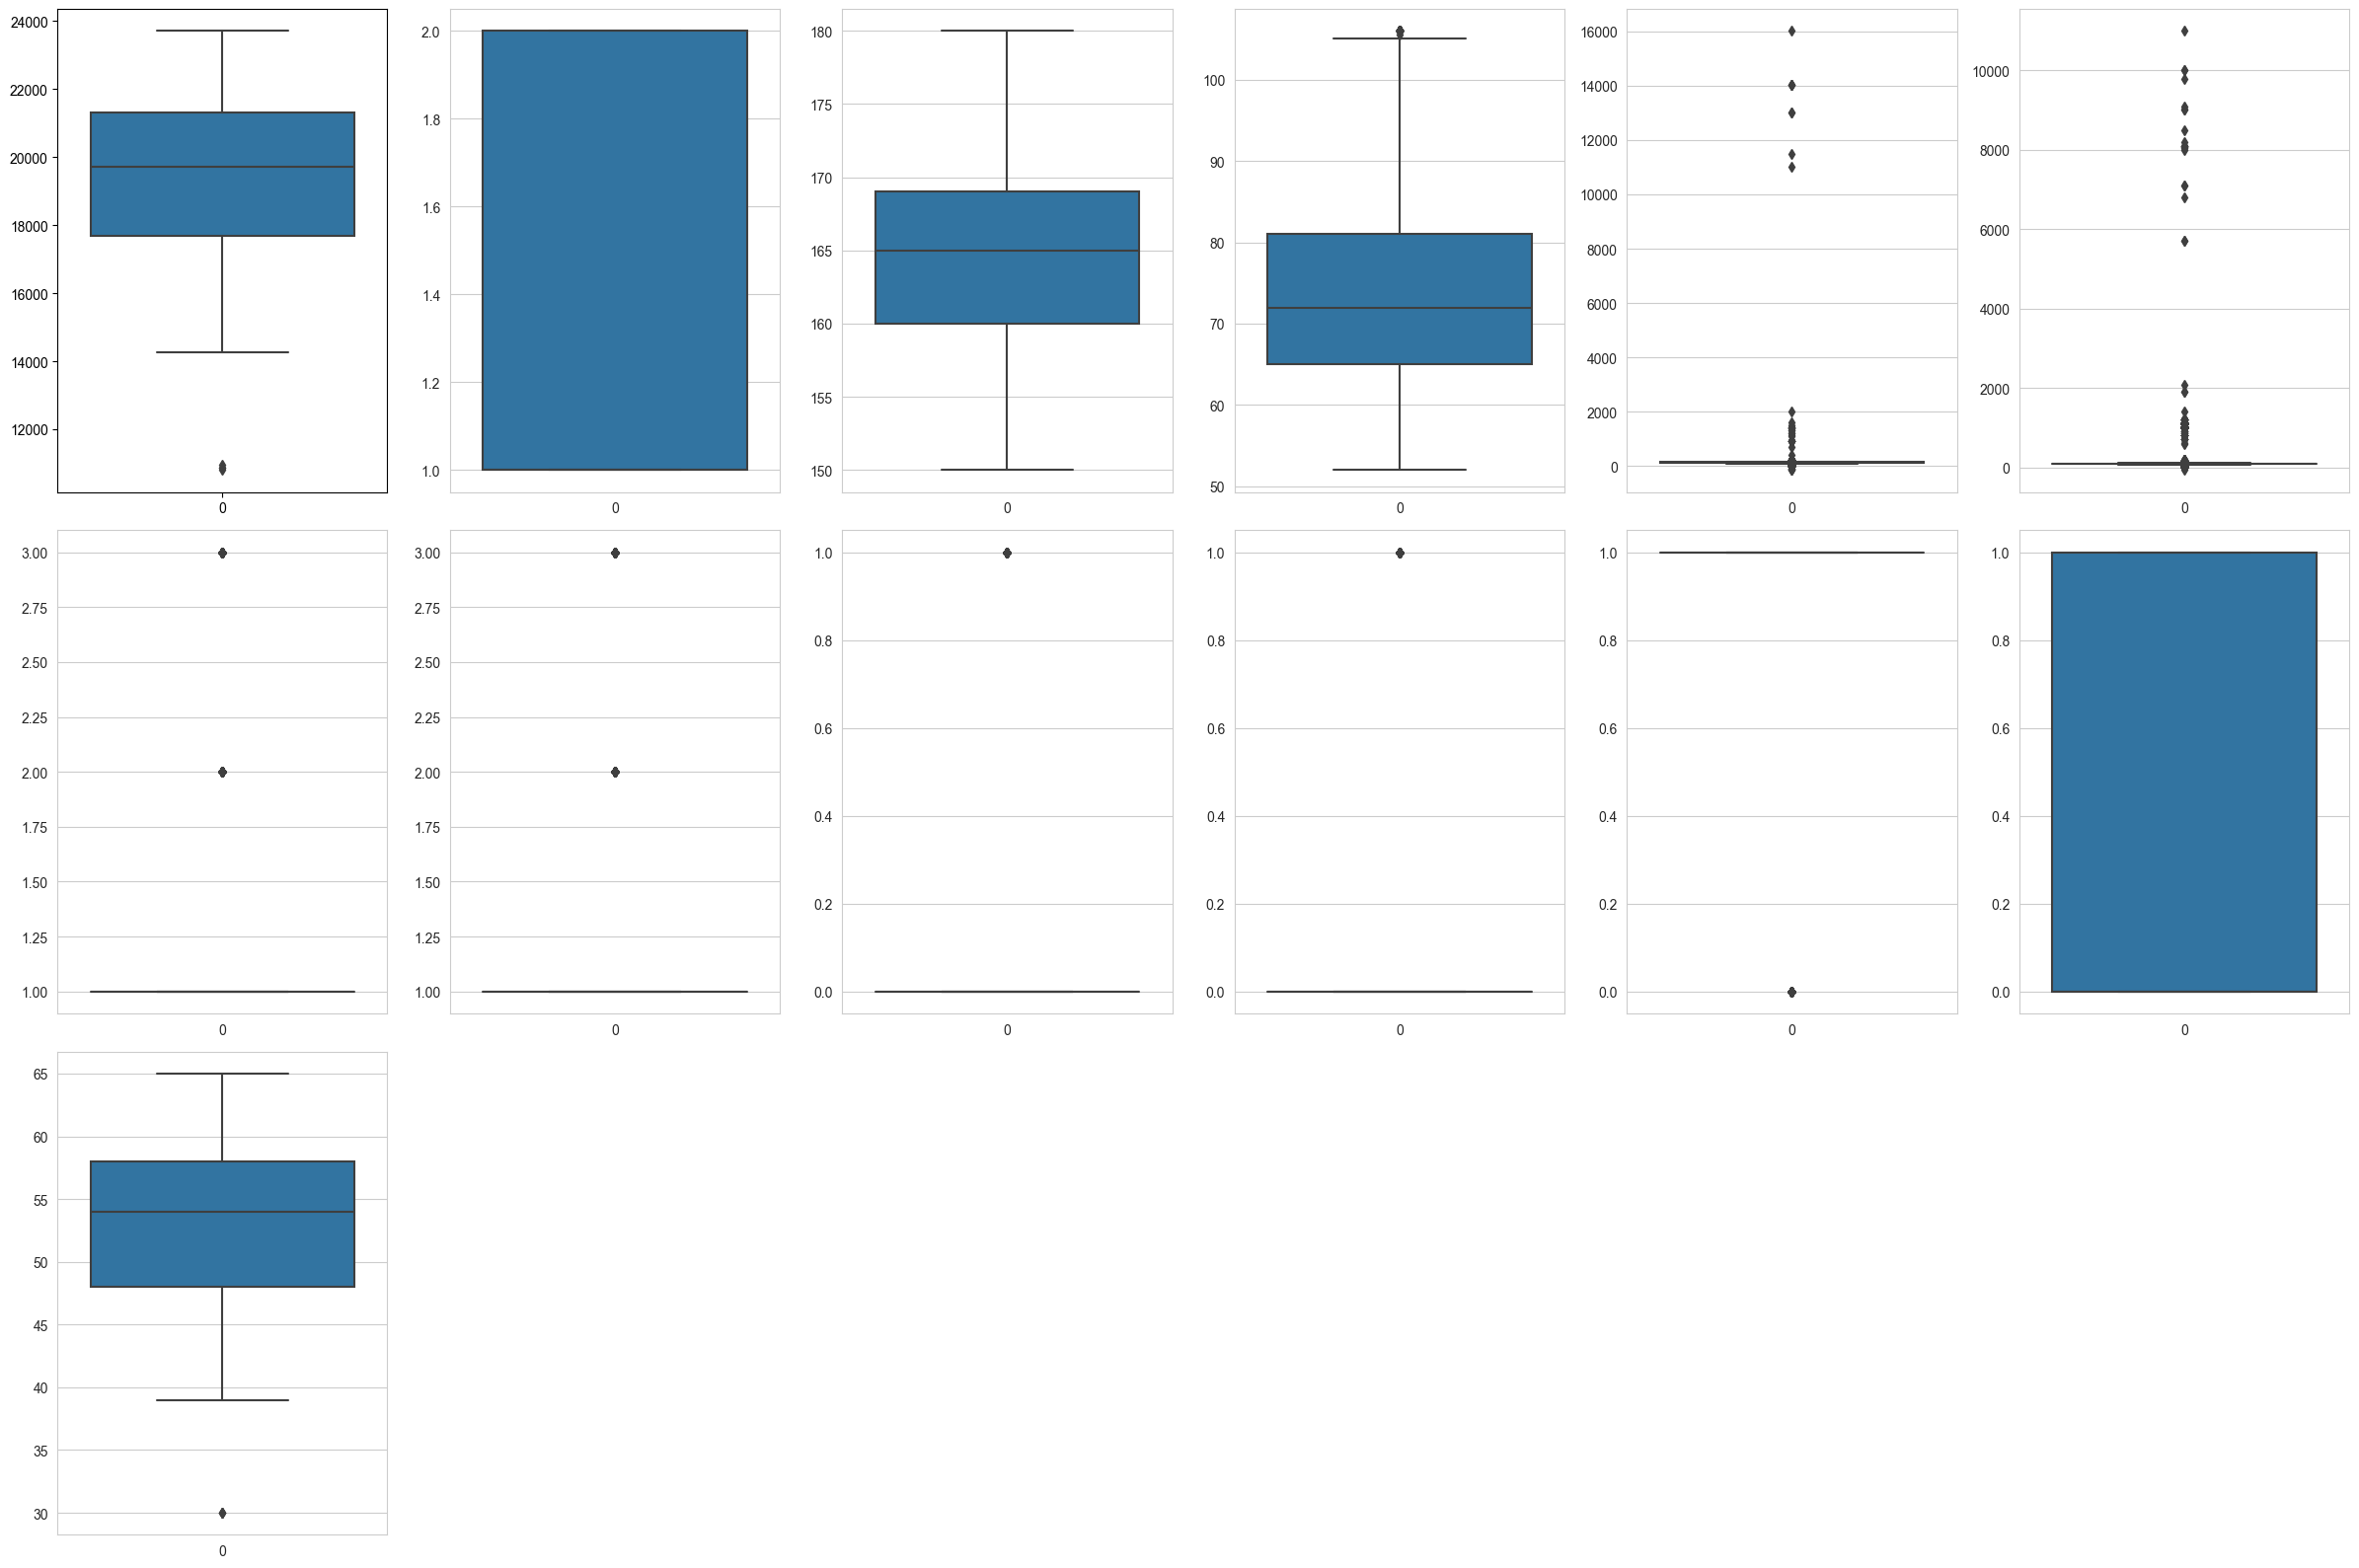

In [17]:
# check outliers

def check_outliers(df):
    l = df.columns.values
    number_of_columns=int((len(l)-1)/2)
    number_of_rows = 2
    plt.figure(figsize=(4*number_of_columns,8*number_of_rows))
    for i in range(1,len(l)):
        plt.subplot(number_of_rows + 1,number_of_columns,i)
        sns.set_style('whitegrid')
        sns.boxplot(df[l[i]],orient='v')
        plt.tight_layout()
        
check_outliers(df)

The above boxplots confirm our suspicion that there are outliers in the dataset. There appear to be several outliers in the systolic and diastolic variables (ap_hi and ap_lo). These outliers might be explained by human error when entering data into the .csv format. Our prediction model might benefit if these outliers were removed from the data.

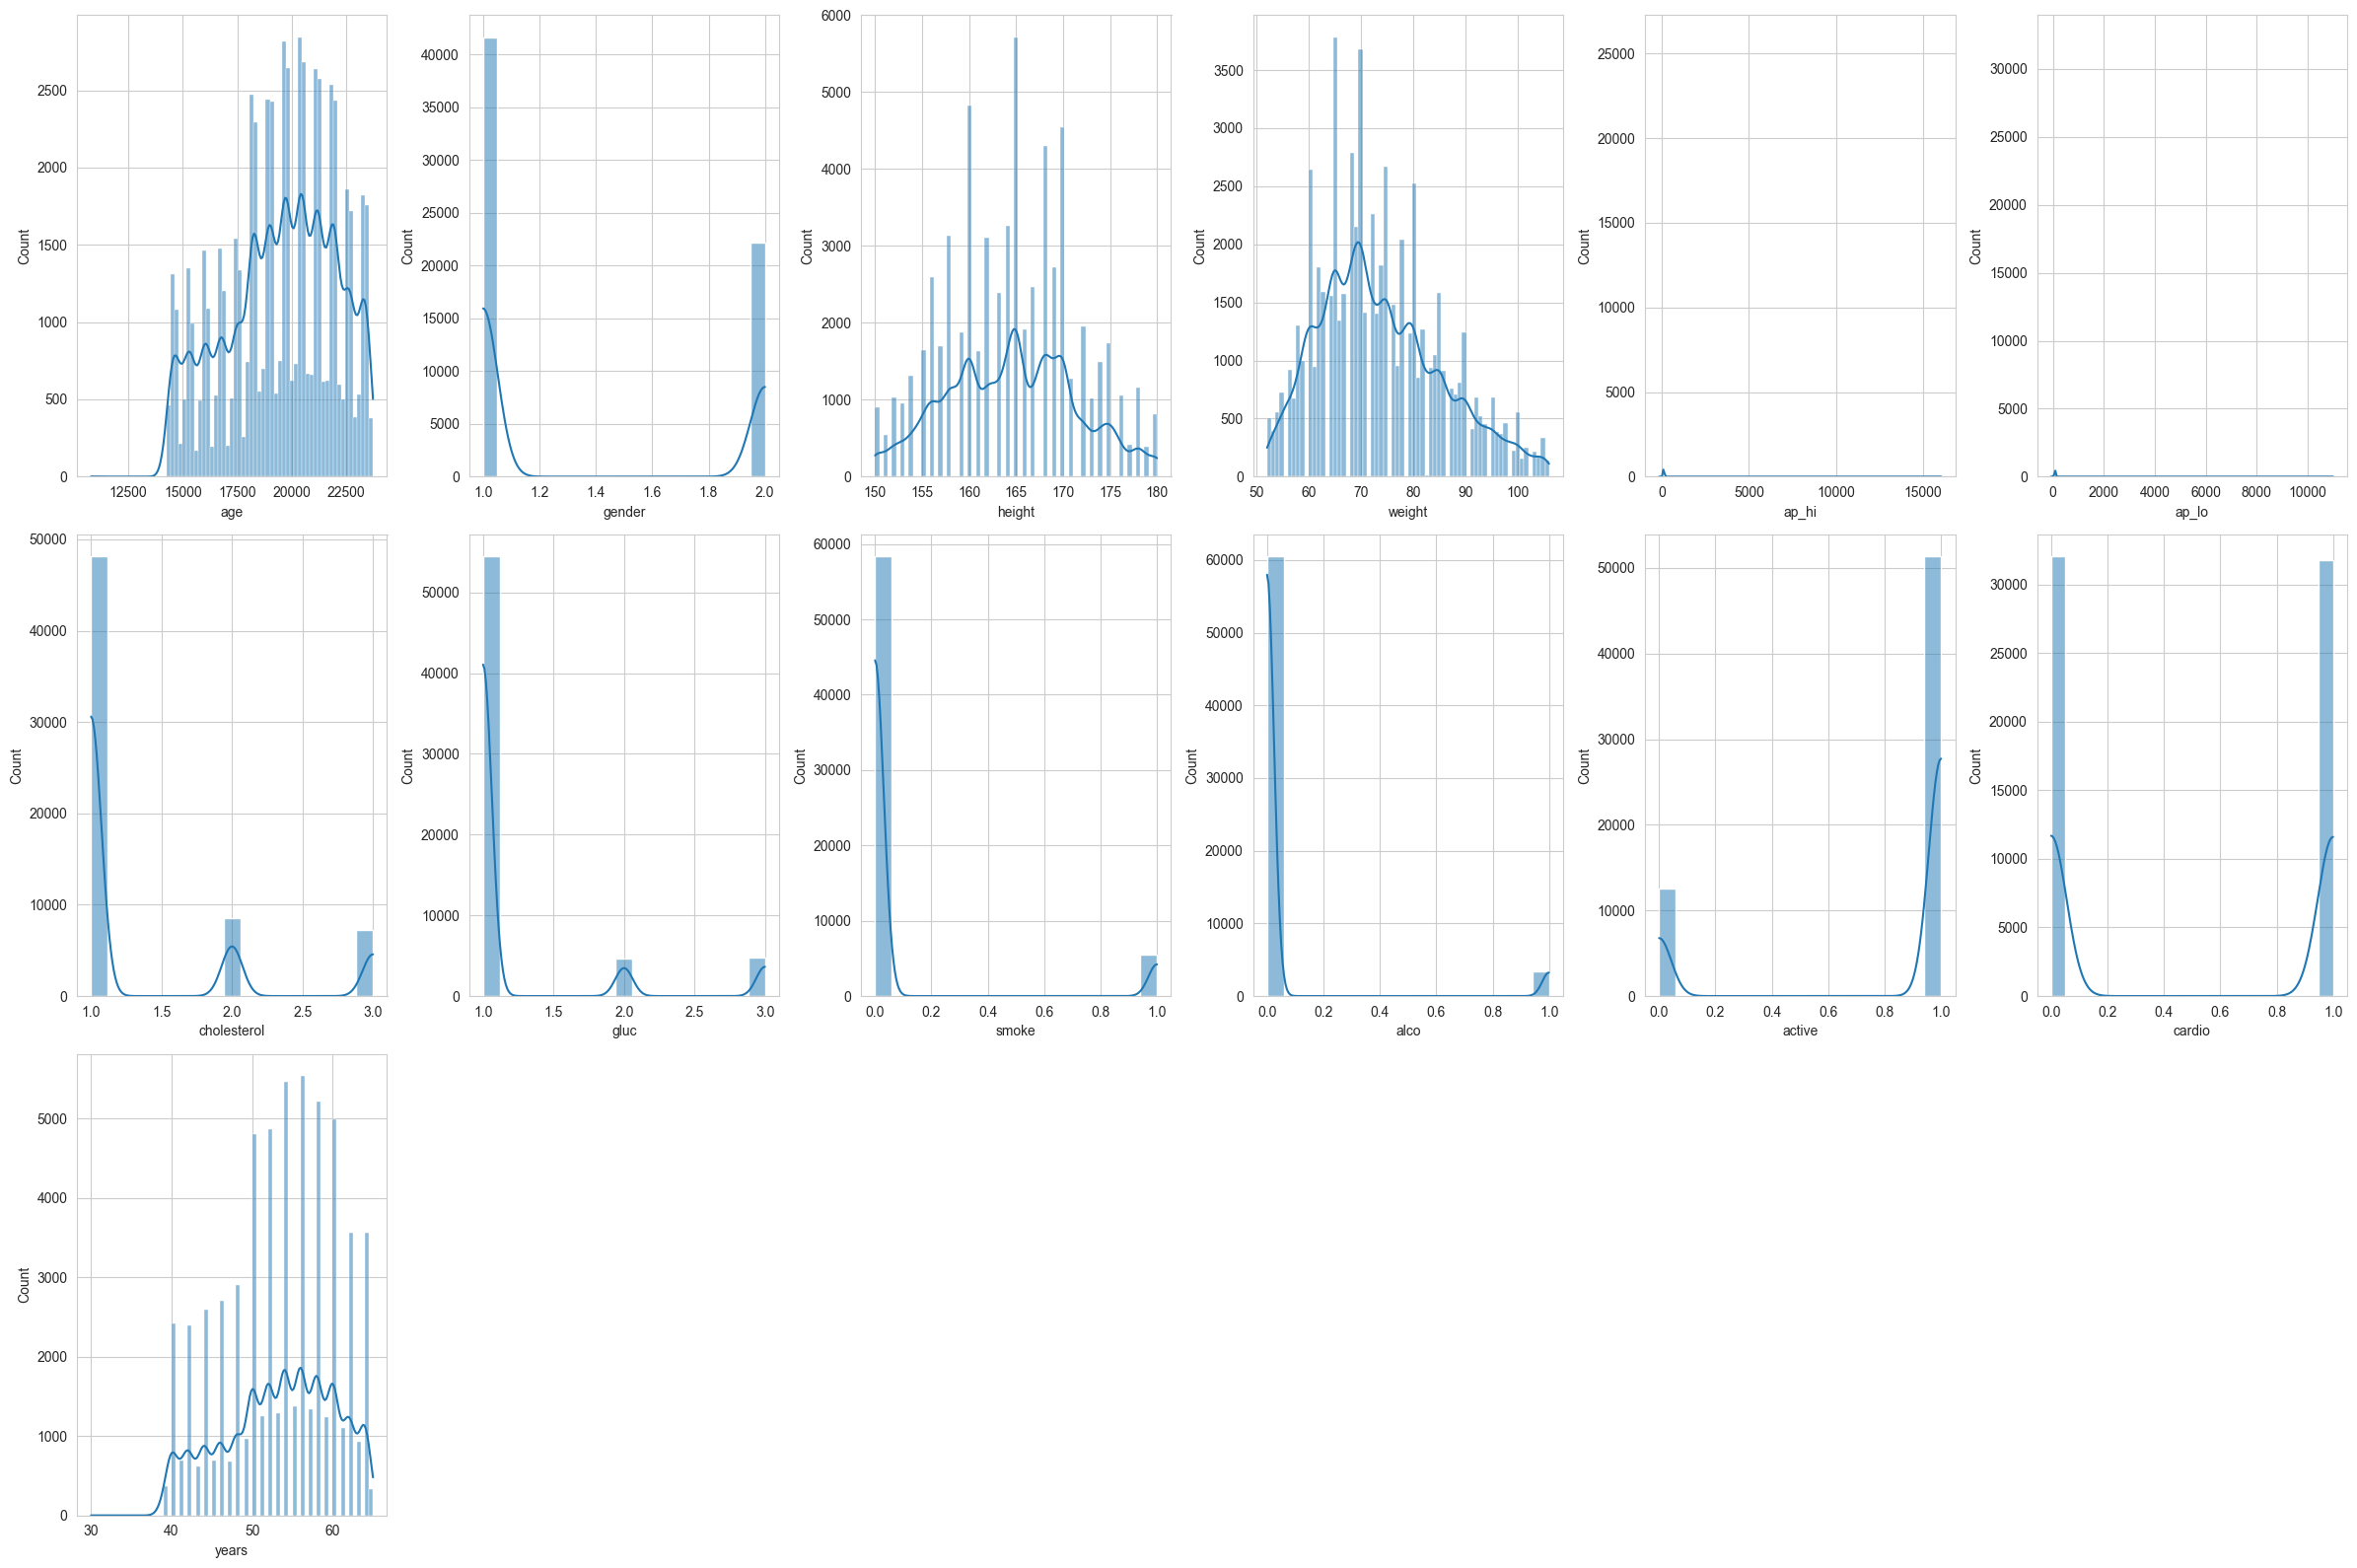

In [18]:
# check distribution and skew
def check_dist(df):
    l = df.columns.values
    number_of_columns=int((len(l)-1)/2)
    number_of_rows = 2
    
    plt.figure(figsize=(4*number_of_columns,8*number_of_rows))
    for i in range(1,len(l)):
        plt.subplot(number_of_rows+1,number_of_columns,i)
        sns.histplot(df[l[i]],kde=True) 
        plt.tight_layout()
        
check_dist(df)

Histograms show the distribution of each feature in the dataset. There appears to be some variation in age, but height and weight are roughly normally distributed. However, the histograms further suggest the presence of outliers in the blood pressure features. Moreover, there exist categorical features in the dataset, such as gender, cholesterol, glucose, smoking habits, alcohol use, and activity.

In addition, in some cases diastolic pressure is higher than systolic, which is also incorrect. How many records are inaccurate in terms of blood pressure?

In [19]:
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic one in 1082 cases


Diastilic pressure is higher than systolic one in 1082 cases


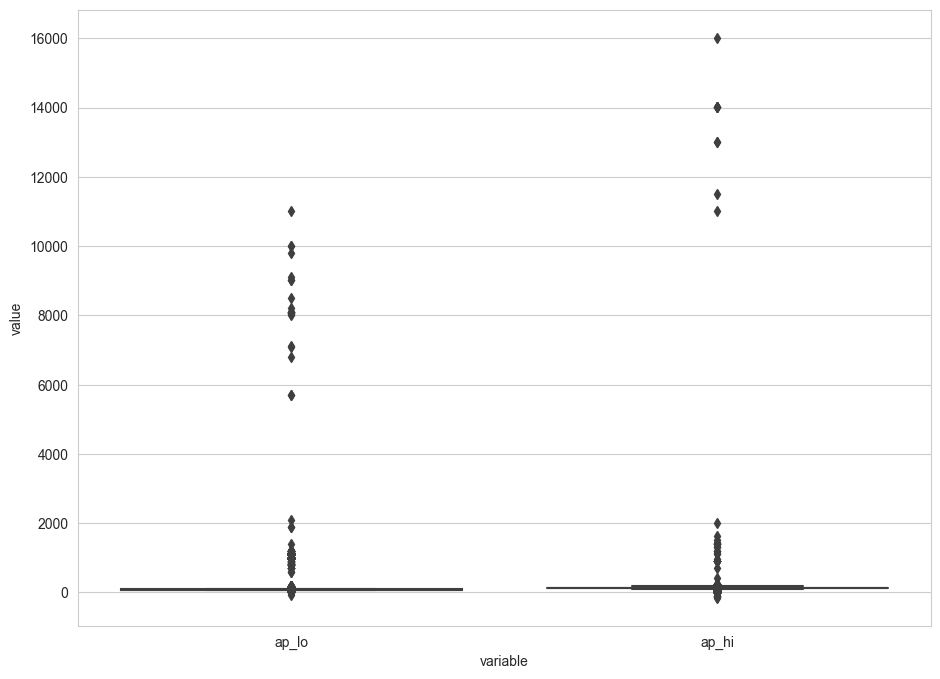

In [20]:
blood_pressure = df.loc[:,['ap_lo','ap_hi']]
sns.boxplot(x = 'variable',y = 'value',data = blood_pressure.melt())
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

In [21]:
# remove outliers in ap_hi and ap_lo
cleaned_df = df[df['ap_hi'] < 250]  
cleaned_df = cleaned_df[cleaned_df['ap_lo'] < 250] 

print(cleaned_df.shape)

(63003, 14)


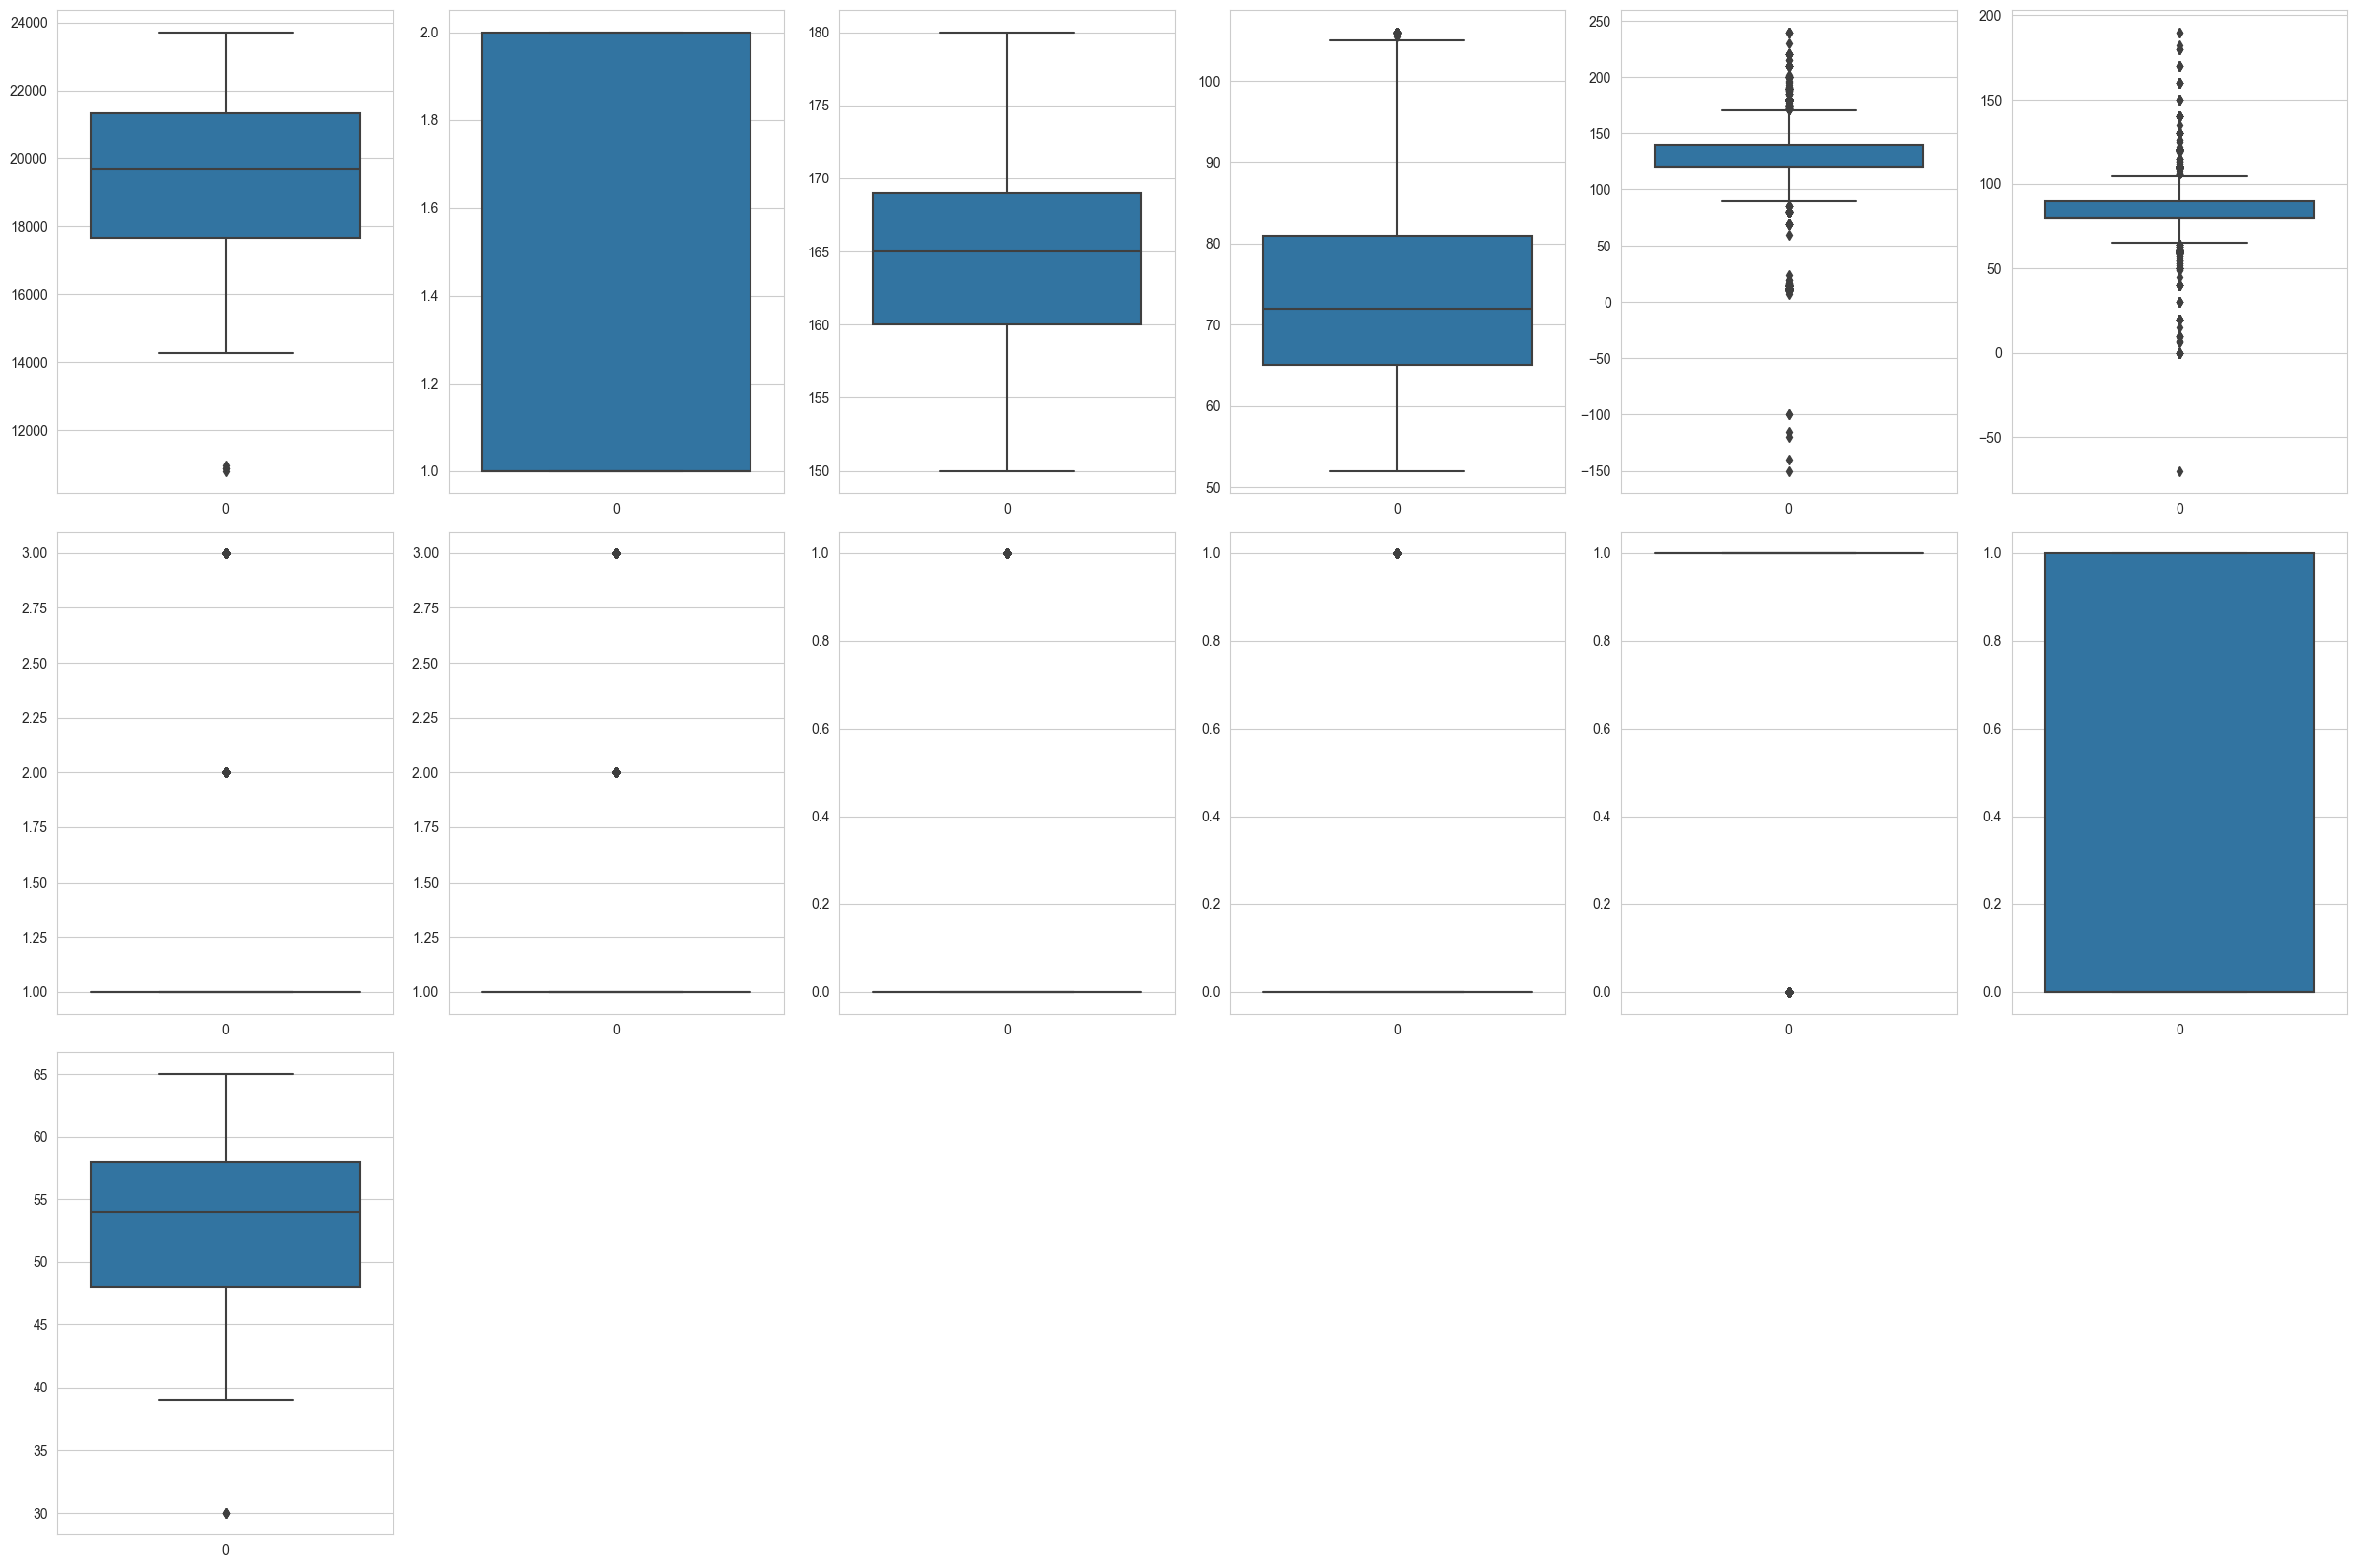

In [22]:
check_outliers(cleaned_df)

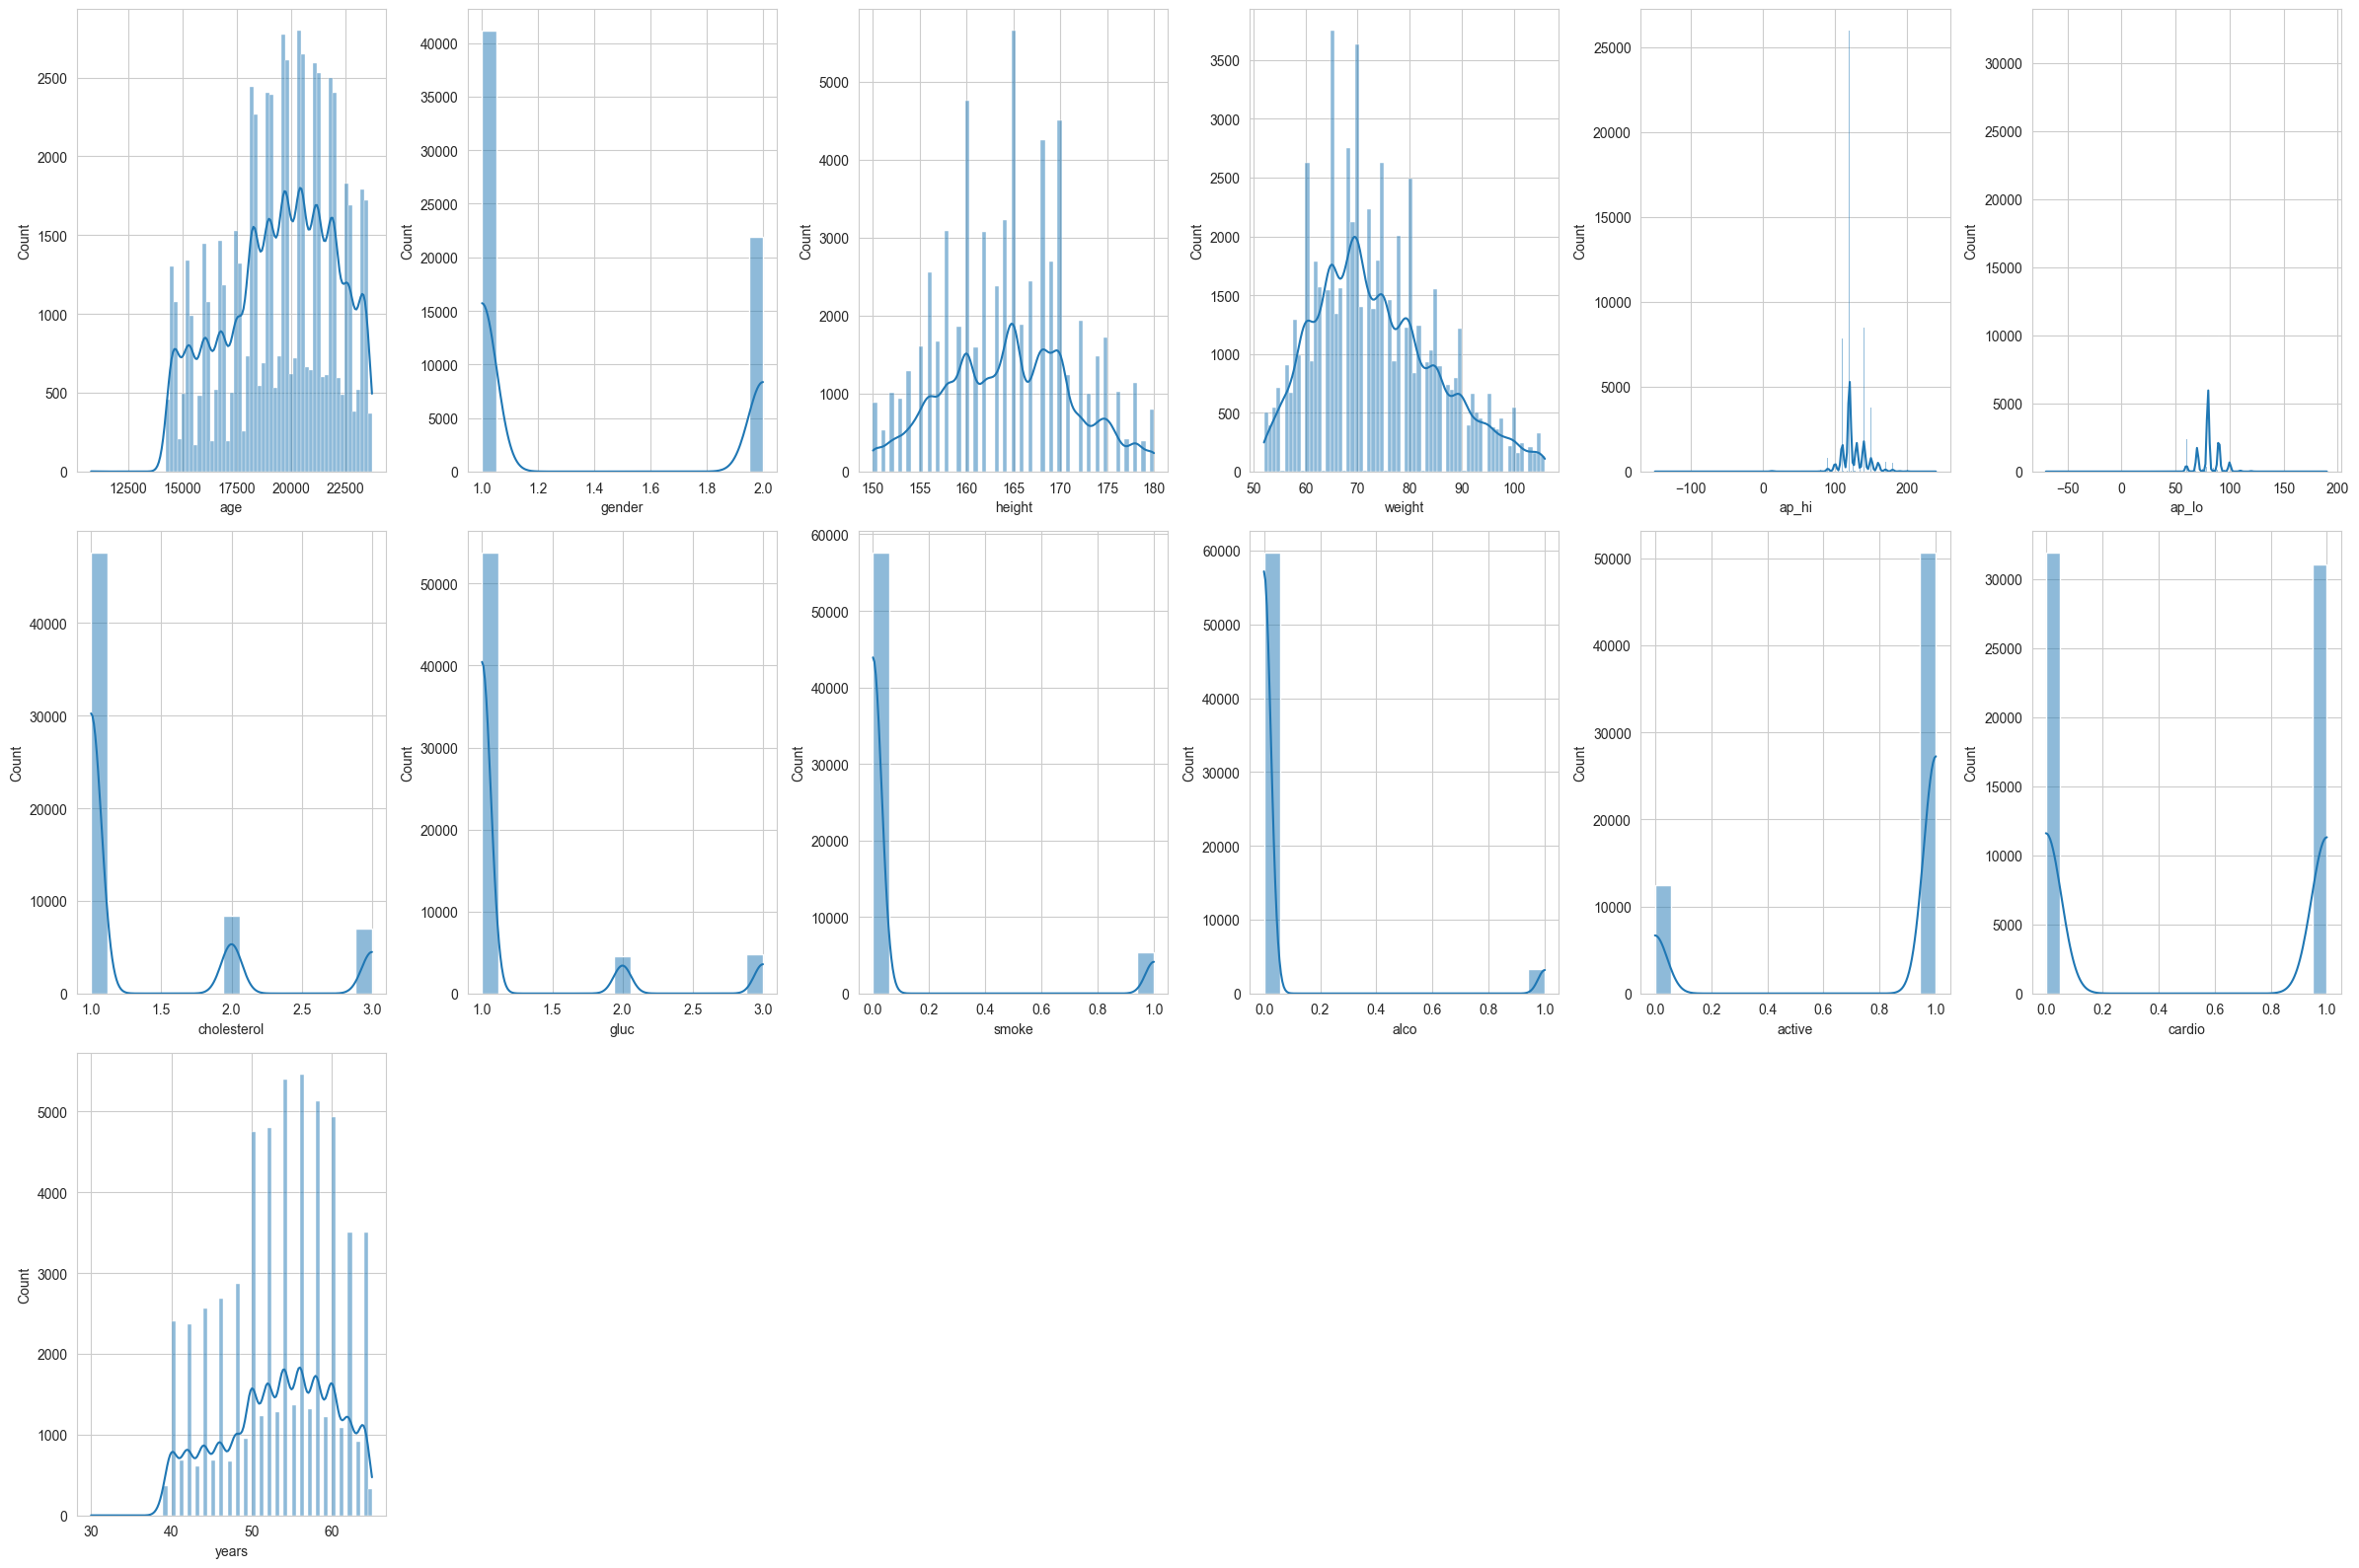

In [23]:
check_dist(cleaned_df)

The dataset was preprocessed to remove outliers in the ap_hi and ap_lo blood pressure features. Only values less than 250 were kept in the data. Through this process, almost 1000 datapoints were discarded, but the resultant distributions depicted in the above bar plots and histograms for ap_hi and ap_lo are roughly normal.

Note that we are dealing with a mix of continuous, ordinal, and binary data, as confirmed from the above data analysis. We can combine all of these data types in one model. Here are a few typical steps we took to preprocess this data before modeling.

Standardize all continuous features: All continuous input should be standardized. For every continuous feature, compute its mean (𝜇) and standard deviation (𝜎) and calculate 𝑥 = (𝑥−𝜇) / 𝜎.
Binarize categorical/discrete features (create dummy variables): For all categorical features, represent them as multiple boolean features. For example, instead of having one feature called cholesterol, have 3 boolean features - chol_normal, chol_above_normal, chol_well_above_normal and appropriately set these features to 0 or 1. As can be seen, for every categorical feature, k binary features are added, where k is the number of values that the categorical feature takes.

In [24]:
cont_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
ord_cols = ['cholesterol', 'gluc']
bin_cols = ['gender', 'smoke', 'alco', 'active', 'cardio']

# create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# create an object to transform the data to fit minmax processor
df_scaled = min_max_scaler.fit_transform(cleaned_df[cont_cols])

# run the normalizer on the dataframe
df_normalized = pd.DataFrame(df_scaled)
df_normalized.columns = cont_cols
df_normalized.head()

,age,height,weight,ap_hi,ap_lo
0,0.588076,0.600000,0.185185,0.666667,0.576923
1,0.730159,0.200000,0.611111,0.743590,0.615385
2,0.624003,0.500000,0.222222,0.717949,0.538462
3,0.528455,0.633333,0.555556,0.769231,0.653846
4,0.516918,0.200000,0.074074,0.641026,0.500000


In [25]:
for col in ord_cols:
    dummies = pd.get_dummies(cleaned_df[col])
    min_ind = min([ind for ind in dummies.columns])
    dummies.columns = ['{0}_{1}'.format(col, ind) for ind in dummies.columns]
    df_normalized = pd.concat([df_normalized, dummies.drop(['{0}_{1}'.format(col, min_ind)], axis=1)], axis=1)

    
df_normalized.head()

,age,height,weight,ap_hi,ap_lo,cholesterol_2,cholesterol_3,gluc_2,gluc_3
0,0.588076,0.600000,0.185185,0.666667,0.576923,False,False,False,False
1,0.730159,0.200000,0.611111,0.743590,0.615385,False,True,False,False
2,0.624003,0.500000,0.222222,0.717949,0.538462,False,True,False,False
3,0.528455,0.633333,0.555556,0.769231,0.653846,False,False,False,False
4,0.516918,0.200000,0.074074,0.641026,0.500000,False,False,False,False


In [26]:
df_normalized = pd.concat([df_normalized, cleaned_df[bin_cols]], axis=1)
df_normalized['gender'] -= 1  # shift the categorical labels for gender to be either 0 or 1

df_normalized.head()

,age,height,weight,ap_hi,ap_lo,cholesterol_2,cholesterol_3,gluc_2,gluc_3,gender,smoke,alco,active,cardio
0,0.588076,0.600000,0.185185,0.666667,0.576923,False,False,False,False,1.0,0.0,0.0,1.0,0.0
1,0.730159,0.200000,0.611111,0.743590,0.615385,False,True,False,False,0.0,0.0,0.0,1.0,1.0
2,0.624003,0.500000,0.222222,0.717949,0.538462,False,True,False,False,0.0,0.0,0.0,0.0,1.0
3,0.528455,0.633333,0.555556,0.769231,0.653846,False,False,False,False,1.0,0.0,0.0,1.0,1.0
4,0.516918,0.200000,0.074074,0.641026,0.500000,False,False,False,False,0.0,0.0,0.0,0.0,0.0


In [27]:
df_normalized.isnull().values.any()

True

In [28]:
df_normalized.dropna(axis = 'index' , how = 'any' , inplace = True)

In [29]:
# save this cleaned data
df_normalized.to_csv(r'C:\Users\lenovo\OneDrive\Documents\Research\Heart\Dataset\cardio_cleaned.csv', index=False)

In [30]:
#separating into train and test data
from sklearn.model_selection import train_test_split
df_normalized= df_normalized.dropna()
print(df_normalized.shape)
X = df_normalized.drop('cardio', axis=1)
y = df_normalized['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42) # 70% training and 30% test

(56742, 14)


In [31]:
# try Logistic Regression
from sklearn.linear_model import LogisticRegression

# Model training 
logi_clf = LogisticRegression()
logi_clf.fit(X_train, y_train)

LogisticRegression()

In [32]:
# try decesion tree
from sklearn.tree import DecisionTreeClassifier

# Model Training
dece_clf = DecisionTreeClassifier()
dece_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
# try Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# create a Gaussian Classifier
rf_clf = RandomForestClassifier(n_estimators=100)

# train the model using the training sets y_pred=clf.predict(X_test)
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [34]:
# try KNN 
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=265)  # k is the number of neighbors to consider
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=265)

In [35]:
# try naive Bayes
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB()

In [36]:
# evaluate the model
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
def evaluate_model(clf, X_test, y_test):

    # predict the response for test dataset
    y_pred = clf.predict(X_test)

    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

    # precision: what percentage of positive tuples are labeled as such?
    print("Precision:",metrics.precision_score(y_test, y_pred))

    # recall: what percentage of positive tuples are labelled as such?
    print("Recall:",metrics.recall_score(y_test, y_pred))
    
    # F1 Score: what percentage of positive tuples are labelled as such?
    print("F1 Score:",metrics.f1_score(y_test, y_pred))
    
    # Specificity: what percentage of positive tuples are labelled as such?
    print("Specificity:",metrics.recall_score(y_test, y_pred, pos_label=0))
    
    #Confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(confusion_mat)

In [37]:
# evaluate logistic regression
evaluate_model(logi_clf, X_test, y_test)

# get feature importances
# feature_imp = pd.Series(logi_clf.feature_importances_,index=X_test.columns).sort_values(ascending=False)
# feature_imp

Accuracy: 0.5893790753686189
Precision: 0.6482743460101121
Recall: 0.3536395251229164
F1 Score: 0.457635009310987
Specificity: 0.8157531091662829
Confusion Matrix:
[[7084 1600]
 [5390 2949]]


In [38]:
# evaluate decesion tree model
evaluate_model(dece_clf, X_test, y_test)

# get feature importances
feature_imp = pd.Series(dece_clf.feature_importances_,index=X_test.columns).sort_values(ascending=False)
feature_imp

Accuracy: 0.5286964694824648
Precision: 0.5188769414575867
Recall: 0.520805852020626
F1 Score: 0.5198396073972111
Specificity: 0.536273606632888
Confusion Matrix:
[[4657 4027]
 [3996 4343]]


age              0.364849
weight           0.205701
height           0.188708
ap_hi            0.072797
ap_lo            0.063616
cholesterol_3    0.035604
gender           0.019500
cholesterol_2    0.012396
alco             0.010117
gluc_3           0.008712
gluc_2           0.008133
smoke            0.005193
active           0.004674
dtype: float64

In [39]:
# evaluate random forest classifier
evaluate_model(rf_clf, X_test, y_test)

# get feature importances
feature_imp = pd.Series(rf_clf.feature_importances_,index=X_test.columns).sort_values(ascending=False)
feature_imp

Accuracy: 0.5524290665570111
Precision: 0.5467411062061802
Recall: 0.5049766159011871
F1 Score: 0.5250296116202232
Specificity: 0.5979963150621833
Confusion Matrix:
[[5193 3491]
 [4128 4211]]


age              0.366745
weight           0.218005
height           0.175745
ap_hi            0.086673
ap_lo            0.062752
cholesterol_3    0.037235
gender           0.011922
cholesterol_2    0.011129
gluc_3           0.006520
active           0.006347
smoke            0.005934
alco             0.005824
gluc_2           0.005169
dtype: float64

In [40]:
# evaluate KNN classifier
evaluate_model(knn_clf, X_test, y_test)

# get feature importances
# feature_imp = pd.Series(knn_clf.feature_importances_,index=X_test.columns).sort_values(ascending=False)
# feature_imp

Accuracy: 0.5913176290900546
Precision: 0.632375478927203
Recall: 0.3958508214414198
F1 Score: 0.486909064090272
Specificity: 0.7790188853063105
Confusion Matrix:
[[6765 1919]
 [5038 3301]]


In [41]:
# evaluate Naive Bayes
evaluate_model(nb_clf, X_test, y_test)

# get feature importances
# feature_imp = pd.Series(nb_clf.feature_importances_,index=X_test.columns).sort_values(ascending=False)
# feature_imp

Accuracy: 0.5880867062209951
Precision: 0.6384310452743585
Recall: 0.366950473677899
F1 Score: 0.46603716113310995
Specificity: 0.80043758636573
Confusion Matrix:
[[6951 1733]
 [5279 3060]]


The RF classifier yielded an accuracy of 0.55 and a recall rate of 0.51. There is room for improvement over the baseline predictive models. Future direction may include tuning hyperparameters for the RF classifiers, or using other types of models, such as linear and logistic regression, Bayesian classifiers, and feed-forward neural networks.